# 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## 당뇨병에 대한 데이터 불러오기

In [1]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
df_X = diabetes.data
df_y = diabetes.target
df_y = df_y

## train, test 데이터 분리하기

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

## w와 b (가중치) 준비

In [3]:
import numpy as np
# 10개의 feature를 가지고 있으므로 w는 10개의 값을 가진다
W = np.random.rand(10)
b = np.random.rand()

## model 함수

In [4]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 손실함수 loss : MSE

In [5]:
# MSE
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse
#loss
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## gradient 함수

In [6]:
def gradient(X, W, b, y):
    # 가중치 개수
    N = len(W)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

## 하이퍼 파라미터 학습률 설정

In [7]:
Learning_rate = 0.0001

## 학습 시키기

Iteration 1000 : Loss 21507.037461614724
Iteration 2000 : Loss 16047.414949639924
Iteration 3000 : Loss 12338.623872038703
Iteration 4000 : Loss 9808.060017277687
Iteration 5000 : Loss 8071.449935950207
Iteration 6000 : Loss 6870.791479855762
Iteration 7000 : Loss 6032.758028248828
Iteration 8000 : Loss 5440.817025866896
Iteration 9000 : Loss 5016.539742342809
Iteration 10000 : Loss 4707.07108340842
Iteration 11000 : Loss 4476.728081619047
Iteration 12000 : Loss 4301.365701931733
Iteration 13000 : Loss 4164.597600782462
Iteration 14000 : Loss 4055.2603772181737
Iteration 15000 : Loss 3965.7115045863325
Iteration 16000 : Loss 3890.68626970218
Iteration 17000 : Loss 3826.5296125119016
Iteration 18000 : Loss 3770.6794553343943
Iteration 19000 : Loss 3721.318789361421
Iteration 20000 : Loss 3677.141049826216
Iteration 21000 : Loss 3637.1915847965347
Iteration 22000 : Loss 3600.760271087708
Iteration 23000 : Loss 3567.3085414362536
Iteration 24000 : Loss 3536.419591494013
Iteration 25000 : 

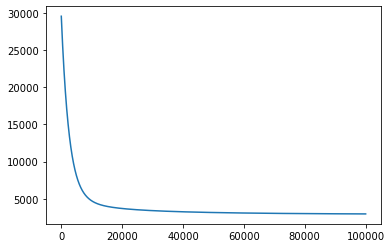

In [8]:
losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration {} : Loss {}'.format(i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

## 학습한 모델 test 데이터에 대한 성능 확인
- loss
- 데이터 시각화

2867.25181725229


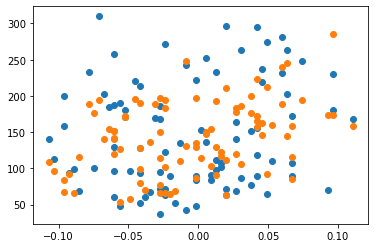

In [9]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 날씨 좋은 월요일 오후 3시, 자전거 타는 사람은 몇명?
## 모듈 import

In [10]:
import pandas as pd
import os
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns

## 캐글 데이터 불러오기

In [11]:
data_dir = 'C:/Users/strfg/OneDrive/바탕 화면/Aiffel/data/bike-sharing-demand'

train_data_path = data_dir + '/train.csv'
test_data_path = data_dir + '/test.csv' 

train_bike = pd.read_csv(train_data_path)
test_bike = pd.read_csv(test_data_path)

In [12]:
train_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [13]:
train_bike['datetime'] = pd.to_datetime(train_bike['datetime'])
test_bike['datetime'] = pd.to_datetime(test_bike['datetime'])

train_bike['year'] = train_bike['datetime'].dt.year
train_bike['month'] = train_bike['datetime'].dt.month
train_bike['day'] = train_bike['datetime'].dt.day
train_bike['hour'] = train_bike['datetime'].dt.hour
train_bike['minute'] = train_bike['datetime'].dt.minute
train_bike['second'] = train_bike['datetime'].dt.second

test_bike['year'] = test_bike['datetime'].dt.year
test_bike['month'] = test_bike['datetime'].dt.month
test_bike['day'] = test_bike['datetime'].dt.day
test_bike['hour'] = test_bike['datetime'].dt.hour
test_bike['minute'] = test_bike['datetime'].dt.minute
test_bike['second'] = test_bike['datetime'].dt.second

train_bike['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

## year, month, day, hour, minute, second 데이터 개수 시각화하기

c:\Users\strfg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\strfg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\strfg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\strfg\anaconda3\lib\si

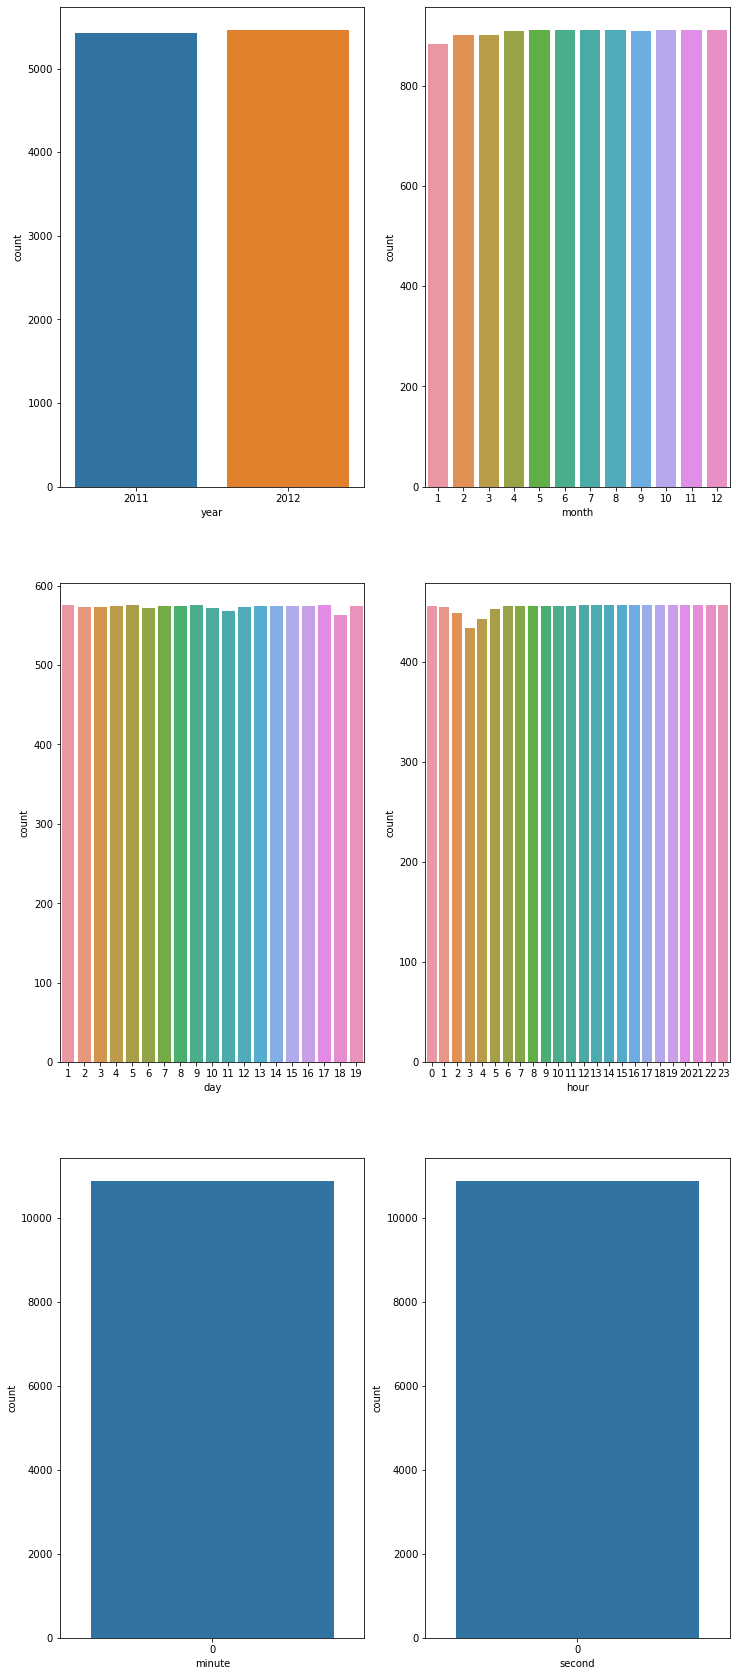

In [14]:
fig, ax = plt.subplots(3,2, figsize=(12, 30))
sns.countplot(train_bike['year'], ax=ax[0,0])
sns.countplot(train_bike['month'], ax=ax[0,1])
sns.countplot(train_bike['day'], ax=ax[1,0])
sns.countplot(train_bike['hour'], ax=ax[1,1])
sns.countplot(train_bike['minute'], ax=ax[2,0])
sns.countplot(train_bike['second'], ax=ax[2,1])
fig.show()

- 일별 데이터가 19일까지만 출력이 되고 분, 초 데이터는 0만 있는 것을 볼 수 있다.

## X, y 컬럼 선택 및 train/test 데이터 분리

In [15]:
# 모든 칼럼 보기
print(train_bike.columns)
print(test_bike.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')


- casual, registered는 더하면 count가 되므로 X로는 사용하지 않는다.
- Y로 target value인 count를 사용한다

In [16]:
# y에 count column 저장
y = train_bike['count']
train_bike.drop(columns=['casual', 'registered', 'count'], inplace=True)
train_bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [17]:
# X에 train, test dataframe 저장
train_bike.drop(columns='datetime', inplace=True)
test_bike.drop(columns='datetime', inplace=True)

X = train_bike


In [18]:
# train.csv에서 train과 test로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 14)
(2178, 14)
(8708,)
(2178,)


## LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기

In [20]:
predictions = model.predict(X_test)
predictions.shape

(2178,)

- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기

In [21]:
from sklearn.metrics import mean_squared_error

mse = MSE(y_test, predictions)
mse

20086.11006174298

- rmse 계산 함수 만들기

In [22]:
def RMSE(mse):
    return mse ** 0.5

- rmse 계산하기

In [23]:
rmse = RMSE(mse)
rmse

141.72547428653388

## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

<Figure size 432x288 with 0 Axes>

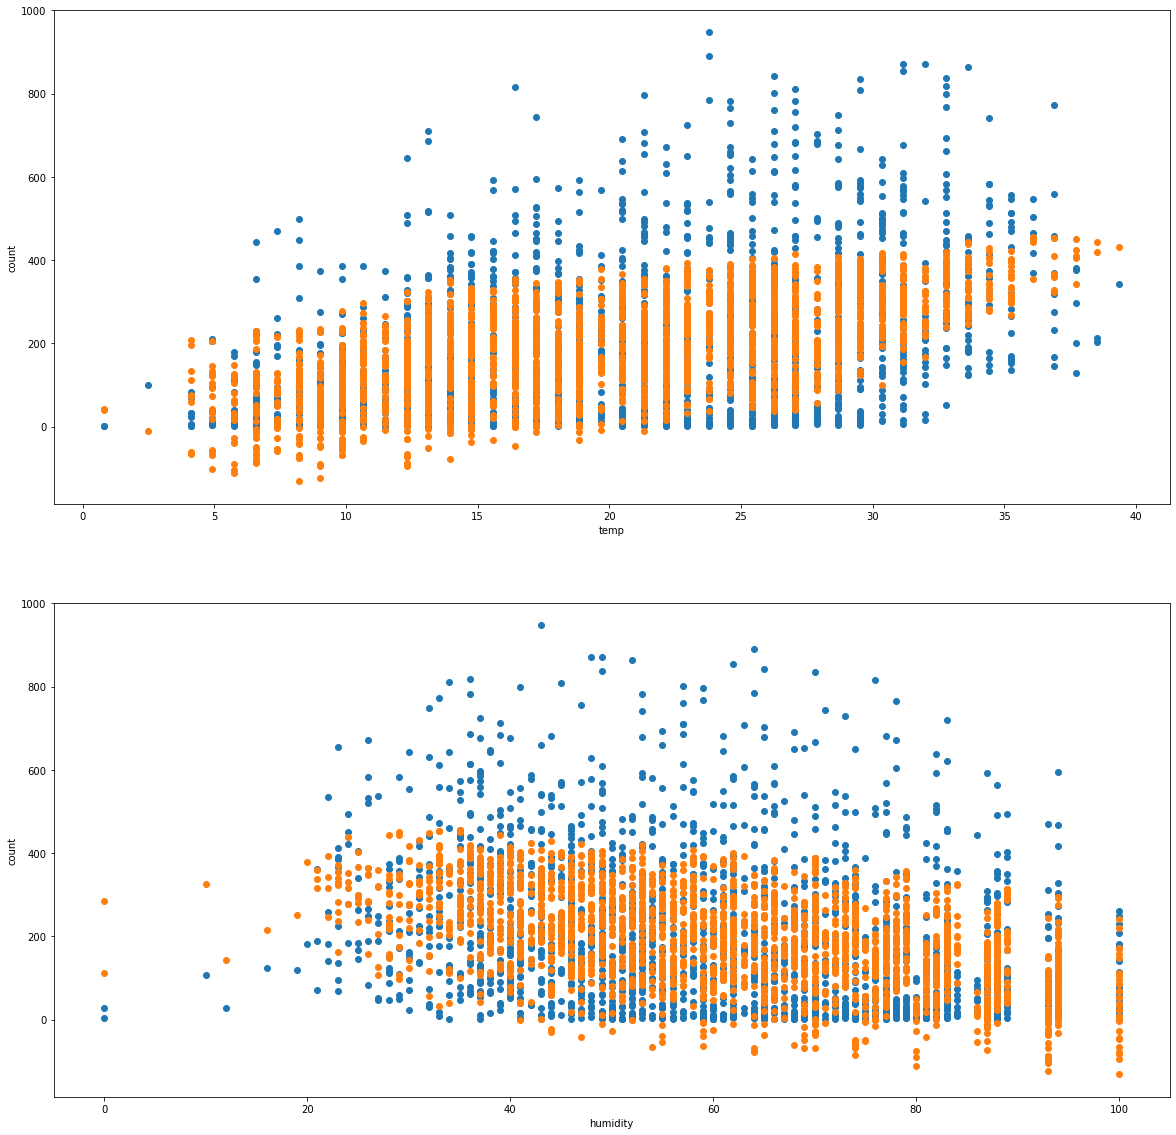

In [40]:
from matplotlib.pyplot import subplots

f = plt.figure()
f, ax = subplots(2,1,figsize=(20,20))

ax[0].scatter(X_test['temp'], y_test)
ax[0].scatter(X_test['temp'], predictions)
ax[0].set_xlabel('temp')
ax[0].set_ylabel('count')

ax[1].scatter(X_test['humidity'], y_test)
ax[1].scatter(X_test['humidity'], predictions)
ax[1].set_xlabel('humidity')
ax[1].set_ylabel('count')
plt.show()

# 회고
## 이번 프로젝트에서 어려웠던 점
- countplot을 subplot과 어떤 식으로 연결하는지 잘 몰라서 좀 헤맸습니다.

## 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
- subplot을 쓸 경우 subplot axis를 다 채우기 전에 plot.show()를 쓰면 subplot을 벗어나 plot되어 subplot axis를 다 채운 후 show()를 써야 한다.